# Simple Linear Regression

We are going to use a simple dataset which contains the heights and weights of people. 

In [1]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Our data is stored in a csv file, which is later read and stored as a pandas DataFrame.

In [2]:
df = pd.read_csv('data.csv') #loading dataset into a dataframe
df.head() #displaying first 5 records

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


We will plot a graph of heights and weights on a scatter plot.

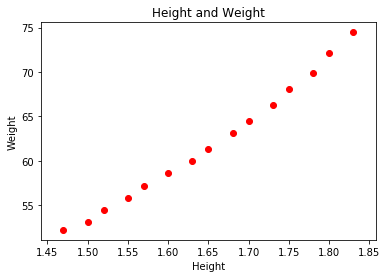

In [3]:
#plotting height and weight scattered
plt.title('Height and Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(df.Height, df.Weight, color = 'red')
plt.show()

We can clearly see above that there's a strong positive correlation between the two features. Hence, we can fit a linear regression model. For that. first we have to use some derived statistical functions to get two important parameters, namely the slope(b1) and intercept(b0) of our hypothetical line. And this line should be able to fit most of our data points .

We have some derived math functions below, which will help us get the required parameters.

In [4]:
#math

def mean(values):
    return float(sum(values)) / float(len(values))


def variance(values, m):
    return float(sum([(x - m)**2 for x in values]))


def covariance(x, y, mean_x, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)

    return float(covar)

# b1 is the slope of the equation
b1 = covariance(df.Height, df.Weight, mean(df.Height), mean(df.Weight)) / variance(df.Height, mean(df.Height))
# b0 is the intercept of the equation
b0 = mean(df.Weight) - b1 * mean(df.Height)
print("Coefficients b0(intercept) is", b0, "and b1(slope) is ", b1)

Coefficients b0(intercept) is -39.06195591884392 and b1(slope) is  61.272186542110624


Now, we are going to plot our regression line and the data points.

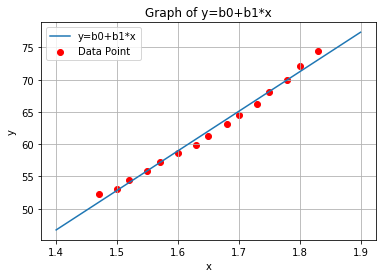

In [5]:
#plotting regression line and data points together

x1 = np.linspace(1.4, 1.9, 10)
y1 = b0 + b1 * x1

plt.plot(x1, y1, label='y=b0+b1*x') #
plt.scatter(df.Height, df.Weight, color = 'red', label = 'Data Point')

plt.title("Graph of y=b0+b1*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left")
plt.grid()
plt.show()

As you can see we are getting a pretty good line, which will allow us to predict weight from given heights.

But we also need to see how accurate is our model. For that, we have Root Mean Squared Error (RMSE) and R2 score. 

In [6]:
X = df['Height'].values
Y = df['Weight'].values
n = len(X)

RMSE is the square root of sum of all errors squared divided by the number of values.

In [7]:
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

0.7066615599131173


R2 score ranges from 0 to 1 usually. The closer it is to 1, the better is our model. But, a negative value can indicate a model gone wrong.

In [8]:
y_mean = mean(Y)
sumofsquares = 0
sumofresiduals = 0
for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.9891969224457968


We have a highly accurate model as you can see the score above.